# Chapter01 Neural Networks Foundations
# 第一章 神经网络基础
 Artificial neural networks (briefly, nets) represent a class of machine learning models, loosely
inspired by studies about the central nervous systems of mammals. Each net is made up of several
interconnected neurons, organized in layers, which exchange messages (they fire, in jargon) when
certain conditions happen. Initial studies were started in the late 1950s with the introduction of the
perceptron (for more information, refer to the article: The Perceptron: A Probabilistic Model for
Information Storage and Organization in the Brain, by F. Rosenblatt, Psychological Review, vol.
65, pp. 386 - 408, 1958), a two-layer network used for simple operations, and further expanded in the
late 1960s with the introduction of the backpropagation algorithm, used for efficient multilayer
networks training (according to the articles: Backpropagation through Time: What It Does and How
to Do It, by P. J. Werbos, Proceedings of the IEEE, vol. 78, pp. 1550 - 1560, 1990, and A Fast
Learning Algorithm for Deep Belief Nets, by G. E. Hinton, S. Osindero, and Y. W. Teh, Neural
Computing, vol. 18, pp. 1527 - 1554, 2006). Some studies argue that these techniques have roots
dating further back than normally cited (for more information, refer to the article: Deep Learning in
Neural Networks: An Overview, by J. Schmidhuber, vol. 61, pp. 85 - 117, 2015). Neural networks
were a topic of intensive academic studies until the 1980s, when other simpler approaches became
more relevant. However, there has been a resurrection of interest starting from the mid-2000s, thanks
to both a breakthrough fast-learning algorithm proposed by G. Hinton (for more information, refer to
the articles: The Roots of Backpropagation: From Ordered Derivatives to Neural Networks and
Political Forecasting, Neural Networks, by S. Leven, vol. 9, 1996 and Learning Representations by
Backpropagating Errors, by D. E. Rumelhart, G. E. Hinton, and R. J. Williams, vol. 323, 1986) and
the introduction of GPUs, roughly in 2011, for massive numeric computation.



These improvements opened the route for modern deep learning, a class of neural networks characterized by a significant number of layers of neurons, which are able to learn rather sophisticated models based on progressive levels of abstraction. People called it deep with 3-5 layers a few years ago, and now it has gone up to 100-200.           

这些改进打开了现代深度学习的路线，一种具有大量神经元层的神经网络通过逐层抽象，能够学习相当复杂的模型。 几年前人们调用只能进行3-5层，现在已经达到100-200。

  This learning via progressive abstraction resembles vision models that have evolved over millions of years in the human brain. The human visual system is indeed organized into different layers. Our eyes
are connected to an area of the brain called the visual cortex V1, which is located in the lower
posterior part of our brain. This area is common to many mammals and has the role of discriminating
basic properties and small changes in visual orientation, spatial frequencies, and colors. It has been
estimated that V1 consists of about 140 million neurons, with 10 billion connections between them.
V1 is then connected with other areas V2, V3, V4, V5, and V6, doing progressively more complex
image processing and recognition of more sophisticated concepts, such as shapes, faces, animals, and
many more. This organization in layers is the result of a huge number of attempts tuned over several
100 million years. It has been estimated that there are ~16 billion human cortical neurons, and about
10%-25% of the human cortex is devoted to vision (for more information, refer to the article: The
Human Brain in Numbers: A Linearly Scaled-up Primate Brain, by S. Herculano-Houzel, vol. 3,
2009). Deep learning has taken some inspiration from this layer-based organization of the human
visual system: early artificial neuron layers learn basic properties of images, while deeper layers
learn more sophisticated concepts.

This book covers several major aspects of neural networks by providing working nets coded in
Keras, a minimalist and efficient Python library for deep learning computations running on the top of
either Google's TensorFlow (for more information, refer to  https://www.tensorflow.org/ ) or University of
Montreal's Theano (for more information, refer to  http://deeplearning.net/software/theano/ ) backend. So, let's
start.

    In this chapter, we will cover the following topics:      
    在本章，我们将介绍一下内容：       
* Perceptron
* 感知器
* ultilayer perceptron
* 多层感知器
* Activation functions
* 激活函数
* Gradient descent
* 梯度下降
* Stochastic gradient descent
* 随机梯度下降
* Backpropagation
* 反向传播算法

## 1.1Perceptron
## 1.1感知器
The perceptron is a simple algorithm which, given an input vector $x$ of $n$ values $（x_1，x_2，...，x_n）$ often
called input features or simply features, outputs either 1 (yes) or 0 (no). Mathematically, we define a
function:      
感知器是一个简单的算法，它使得给定的$n$个输入值$（x_1，x_2，...，x_n）$的向量$x$
（这些向量通常被称为输入特征或者简单特征），输出为1（是）或0（否）。 在数学上，我们定义一个
函数：

$$f(x)=\left\{\begin{array}\\1\quad wx+b>0\\0\quad 其他\end{array}\right.$$





Here, $w$ is a vector of weights, $wx$ is the dot product $ \sum_{j=1}^n w_j x_j $ , and $b$ is a bias. If you remember
elementary geometry, $wx + b$ defines a boundary hyperplane that changes position according to the
values assigned to $w$ and $b$. If $x$ lies above the straight line, then the answer is positive, otherwise it is
negative. Very simple algorithm! The perception cannot express a maybe answer. It can answer yes
(1) or no (0) if we understand how to define $w$ and $b$, that is the training process that will be
discussed in the following paragraphs.          
这里，$w$是权重向量，$wx$是点乘积$ \sum_{j=1}^n w_j x_j $，$b$是偏差。 如果你记得
基础的几何，应该知道$wx + b$定义了一个边界超平面，我们可以通过设置$w$和$b$的值来改变它的位置
。 如果$x$位于直线之上，则结果为正，否则为负。 非常简单的算法！ 感知器不能表达一个"可能性"的答案。如果我们了解如何定义$w$和$b$，通过训练， 它可以回答是（1）或否（0）,
在以下段落中我们将讨论这一点如何实现。
                   


### The first example of Keras code
###  第一个Keras代码例子 


The initial building block of Keras is a model, and the simplest model is called sequential. A
sequential Keras model is a linear pipeline (a stack) of neural networks layers. This code fragment
defines a single layer with  12 artificial neurons, and it expects  8 input variables (also known as
features):       
Keras的初始构建模块是一个模型，最简单的模型称为“序贯模型”。 一个
Keras序贯模型是神经网络层的线性管道（堆栈）。 以下代码段
定义了一个具有12个人工神经元的单层神经网络，它有8个输入变量（也称为特征）：


In [2]:
from keras.models import Sequential
#from keras.layers.core import Dense, Activation，需要添加
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(12, input_dim=8, kernel_initializer='random_uniform'))

Each neuron can be initialized with specific weights. Keras provides a few choices, the most common of which are listed as follows:                    
每个神经元可以用特定的权重进行初始化。 keras提供了几个选择，最常见的选择如下：             

* random_uniform : Weights are initialized to uniformly random small values in (-0.05, 0.05). In other words, any value within the given interval is equally likely to be drawn.
* random_uniform ：初始化权重值为（-0.05,0.05）中的均匀随机小值。话句话说，给定间隔内的任何值同样可能被生成。             

* random_normal : Weights are initialized according to a Gaussian, with a zero mean and small standard deviation of 0.05. For those of you who are not familiar with a Gaussian, think about a symmetric bell curve shape.
* random_normal：根据高斯分布初始化权重值，平均值为零，标准偏差为0.05。 若你不熟悉高斯分布，想想一下对称钟形曲线形状。           

* zero : All weights are initialized to zero.
* zero:所有权重值初始化为零。

A full list is available at https://keras.io/initializations/              
完整列表可在以下链接查看：https://keras.io/initializations/

## 1.2Multilayer perceptron — the first example of a network
## 1.2多层感知器——第一个网络的例子 

In this chapter, we define the first example of a network with multiple linear layers. Historically,
perceptron was the name given to a model having one single linear layer, and as a consequence, if it
has multiple layers, you would call it multilayer perceptron (MLP). The following image represents
a generic neural network with one input layer, one intermediate layer and one output layer.                    
在本章中，我们定义了具有多个线性层网络的第一个例子。按惯例，
感知器是具有一个单一线性层的模型的名称，因此，如果它聚
有多层，你可以称之为多层感知器（MLP）。 以下图像代表
具有一个输入层，一个中间层和一个输出层的通用神经网络。
![](http://i2.muimg.com/588926/fba5e9e8ccf3b51d.png)
In the preceding diagram, each node in the first layer receives an input and fires according to the
predefined local decision boundaries. Then the output of the first layer is passed to the second layer,
the results of which are passed to the final output layer consisting of one single neuron. It is
interesting to note that this layered organization vaguely resembles the patterns of human vision we
discussed earlier.           
在上图中，第一层中的每个节点接收到一个输入，并根据此触发
预定义的局部决策界限。 然后将第一层的输出传递到第二层，
其结果被传递到由一个单个神经元组成的最终输出层。 
有趣的是，这种分层组织有些类似于前面讨论过的人类视觉模式。


The net is dense, meaning that each neuron in a layer is connected to all neurons
located in the previous layer and to all the neurons in the following layer.     
由此所组成的网络是密集的，这意味着一层中的每个神经元都连接到位于上一层的所有神经元
和下一层的所有神经元。

### Problems in training the perceptron and a solution
### 训练感知器和解决方案的问题
Let's consider a single neuron; what are the best choices for the weight $w$ and the bias $b$? Ideally, we
would like to provide a set of training examples and let the computer adjust the weight and the bias in
such a way that the errors produced in the output are minimized. In order to make this a bit more
concrete, let's suppose we have a set of images of cats and another separate set of images not
containing cats. For the sake of simplicity, assume that each neuron looks at a single input pixel value.
While the computer processes these images, we would like our neuron to adjust its weights and bias
so that we have fewer and fewer images wrongly recognized as non-cats. This approach seems very
intuitive, but it requires that a small change in weights (and/or bias) causes only a small change in
outputs.                     
我们来考虑单个神经元; 权重$w$和偏差$b$的最佳选择是什么？ 理想情况下，我们
想提供一套训练集，让计算机调整权重值和偏差值来使输出中产生的误差最小化。 为了使这一点更具体，我们假设我们有一组包含猫的图像和另一组单独不包含猫的图像。为了简单起见，假设每个神经元都看到单个输入像素值。
当计算机处理这些图像时，我们希望我们的神经元调整其重量和偏差，使得我们有越来越少的图像被错误地识别为非猫。 这种方法似乎非常直观，但是它要求权重（和/或偏差）的微小变化只会在输出上产生微小变化。


If we have a big output jump, we cannot progressively learn (rather than trying things in all possible directions—a process known as exhaustive search—without knowing if we are improving). After all,kids learn little by little. Unfortunately, the perceptron does not show this little-by-little behavior. A perceptron is either 0 or 1 and that is a big jump and it will not help it to learn, as shown in the following graph:   
如果我们有一个巨大的输出增量，我们不能逐步学习（并非在所有可能的方向上尝试——这一的详尽搜索过程我们不知道是否在改进）。 毕竟，孩子们是一点一点学习的。 不幸的是，感知器并不表现出这种一点一点学习的行为。 感知器是0或1，这是一个大的增量，它不会帮助它学习，如下图所示：      
![](http://i1.piimg.com/588926/e8b393495ed9048f.png)

We need something different, smoother. We need a function that progressively changes from 0 to 1 with no discontinuity. Mathematically, this means that we need a continuous function that allows us to compute the derivative.  
我们需要不同的东西，它应该具有更平滑的性质。 我们需要一个从0到1逐渐变化的函数，没有不连续性。 在数学上，这意味着我们需要一个连续的函数，使我们能够计算导数。     

### Activation function — sigmoid
### 激活函数——sigmoid
The sigmoid function is defined as follows:      
sigmoid函数的定义如下： 
$$\sigma(x)= \frac{1}{1+e^{-x}} $$
As represented in the following graph, it has small output changes in (0, 1) when the input varies in. Mathematically, the function is continuous. A typical sigmoid function is represented in the following graph:        
如下图所示，当输入变化时，（0,1）中的输出变化小。数学上，该函数是连续的。 典型的igmoid函数如下图所示：    
![](http://i2.muimg.com/588926/1461c537b1135098.png)          
A neuron can use the sigmoid for computing the nonlinear function $\sigma(z=wx+b)$ . Note that, if $z=wx+b$ is very large and positive, then $e^{-z}\rightarrow0$ , so $\sigma(z)\rightarrow1$  , while if $z=wx+b$ is very large and negative  ，$e^{-z}\rightarrow\infty$ ,so  $e^{z}\rightarrow 0$  . In other words, a neuron with sigmoid activation has a behavior similar to the perceptron, but the changes are gradual and output values, such as 0.5539 or 0.123191, are perfectly legitimate. In this sense, a sigmoid neuron can answer maybe.              
神经元可以使用sigmoid 来计算非线性函数$\sigma(z=wx+b)$。 请注意，如果$z=wx+b$ 是非常大和正的，那么 $e^{-z}\rightarrow0$，所以$\sigma(z)\rightarrow1$，而如果$z=wx+b$ 非常大和负的，$e^{-z}\rightarrow\infty$，所以$e^{z}\rightarrow 0$。 换句话说，具有sigmoid激活的神经元具有类似于感知器的行为，但变化是渐进的，输出值（如0.5539或0.123191）是完全合适的。 在这个意义上，Sigmoid神经元可以被解决之前提出的问题。       

### Activation function — ReLU
### 激活函数——ReLU
The sigmoid is not the only kind of smooth activation function used for neural networks. Recently, a very simple function called rectified linear unit (ReLU) became very popular because it generates very good experimental results. A ReLU is simply defined as $f(x)=max(0,x)$ , and the nonlinear function is represented in the following graph. As you can see in the following graph, the function is zero for negative values, and it grows linearly for positive values:
sigmoid不是唯一一种用于神经网络的平滑激活函数。 最近，一个非常简单的称为线性纠正单元（ReLU）的函数变得非常受欢迎，因为它产生了非常好的实验结果。 ReLU被简单地定义为$f(x)=max(0,x)$，并且非线性函数如下图所示。对于负值，函数为零，对于正值，它将线性增长： 
![](http://i1.piimg.com/588926/2046f27aee8eec0a.png)

### Activation functions
### 激活函数    
Sigmoid and ReLU are generally called activation functions in neural network jargon. In the Testing different optimizers in Keras section, we will see that those gradual changes, typical of sigmoid and ReLU functions, are the basic building blocks to developing a learning algorithm which adapts little by little, by progressively reducing the mistakes made by our nets. An example of using the activation function $\sigma$ with the $(x_1 , x_2 , ..., x_m )$ input vector, $(w_1 , w_2 , ..., w_m )$ weight vector, $b$ bias, and $\sum$summation is given in the following diagram:     
Sigmoid和ReLU通常称为神经网络术语中的激活函数。 在Keras中测试不同的优化器时，我们将看到，Sigmoid和ReLU函数的典型变化是开发学习算法的基本构件，逐渐减少了网络的错误。 下图给出了一个例子，其中 $(x_1 , x_2 , ..., x_m )$为输入向量，$(w_1 , w_2 , ..., w_m )$为使用激活函数$\sigma$ 的权重向量，$b$为偏量,$\sum$表示总和： 
![](http://i4.buimg.com/588926/c36f694da7481427.png)    
Keras supports a number of activation functions, and a full list is available at  https://keras.io/activations/ .             
keras提供了多种激活函数，完整列表如下： https://keras.io/activations/

## 1.3A real example — recognizing handwritten digits
## 1.3一个真正的例子——识别手写数字
In this section, we will build a network that can recognize handwritten numbers. For achieving this goal, we use MNIST(for more information, refer to  http://yann.lecun.com/exdb/mnist/ ) , a database of handwritten digits made up of a training set of 60,000 examples and a test set of 10,000 examples.The training examples are annotated by humans with the correct answer. For instance, if the handwritten digit is the number three, then three is simply the label associated with that example.     
在本节中，我们将构建一个可识别手写数字的网络。 为了实现这一目标，我们使用MNIST（更多信息参见 http://yann.lecun.com/exdb/mnist/ ） ， 一个由60,000个样本的训练集和10,000个样本的测试集组成的手写数字数据库。训练样本由人类给出正确的答案。 例如，如果手写数字是“三”，那么“三”就是与该样本相关联的标签。         

In machine learning, when a dataset with correct answers is available, we say that we can perform a form of supervised learning. In this case, we can use training examples for tuning up our net. Testing examples also have the correct answer associated with each digit. In this case, however, the idea is to pretend that the label is unknown, let the network do the prediction, and then later on, reconsider the label to evaluate how well our neural network has learned to recognize digits. So, not unsurprisingly,testing examples are just used to test our net.          
在机器学习中，当具有正确答案的数据集存在时，我们则可以进行有监督学习。 在这种情况下，我们可以使用训练样本来调整网络。 测试样本也具有与每个数字相关联的正确答案。 然而，在这种情况下，这个想法是假装标签是未知的，让网络进行预测，然后再重新考虑标签来评估我们的神经网络学到识别数字的程度。 所以，毫不奇怪，测试样本只是用来测试我们的网络。        

Each MNIST image is in gray scale, and it consists of 28 x 28 pixels. A subset of these numbers is represented in the following diagram:      
每个MNIST图像都是灰度的，它由28 x 28个像素组成。 这些数字的一个子集如下图所示：         
![](http://i1.piimg.com/588926/ad61e1983f936e8f.png)

### One-hot encoding 
### One-hot 编码         
In many applications, it is convenient to transform categorical (non-numerical) features into numerical variables. For instance, the categorical feature digit with the value d in [0-9] can be encoded into a binary vector with 10 positions, which always has 0 value, except the d-th position where a 1 is present. This type of representation is called one-hot encoding (OHE) and is very common in data mining when the learning algorithm is specialized for dealing with numerical functions.    
在许多应用中，将分类（非数字）特征转换为数值变量是很方便的。 例如，具有[0-9]中值d的分类特征数字可以被编码为具有10个位置的二进制向量，除了第d个位置为1，其他位置始终为0值。 这种类型的表示法被称为 One-hot编码（OHE），当学习算法专门用于处理数字函数时，在数据挖掘中非常普遍。

### Defining a simple neural net in Keras
### 在Keras中定义简单的神经网络
Here, we use Keras to define a network that recognizes MNIST handwritten digits. We start with a very simple neural network and then progressively improve it.          
在这里，我们使用Keras来定义一个识别MNIST手写数字的网络。 我们从一个非常简单的神经网络开始，然后逐步改进。      

Keras provides suitable libraries to load the dataset and split it into training sets  X_train , used for fine-tuning our net, and tests set  X_test , used for assessing the performance. Data is converted into float32 for supporting GPU computation and normalized to [0, 1]. In addition, we load the true labels into  Y_train and  Y_test respectively and perform a one-hot encoding on them. Let's see the code:       
Keras提供了合适的库来加载数据集，并将其分成训练集X_train，用于微调我们的网络，测试集X_test用于评估性能。 数据转换为float32，用于支持GPU计算并归一化为[0,1]。 另外，我们分别将真正的标签加载到Y_train和Y_test中，并对它们执行一次one-hot编码。 我们来看看代码：     

In [5]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility 每次生成的随机数相同
# network and training 网络和训练
NB_EPOCH = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits 输出位数=数字位数
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter  SGD优化器，在本章后面解释
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION 取全样本的多少比例作训练集
# data: shuffled and split between train and test sets
#在训练和测试集中打乱并切分
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
#X_train是60000行28x28值 - >在60000 x 784重新整形
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize 归一化
#
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

60000 train samples
10000 test samples


In [6]:
#这里可以输出检查下X_train, y_train，X_test或 y_test
X_test.shape

(10000, 784)

The input layer has a neuron associated with each pixel in the image for a total of 28 x 28 = 784 neurons, one for each pixel in the MNIST images.       
输入层具有与图像中的每个像素相关联的神经元，总共28×28 = 784个神经元，一个用于MNIST图像中的每个像素。     


Typically, the values associated with each pixel are normalized in the range [0, 1] (which means that the intensity of each pixel is divided by 255, the maximum intensity value). The output is 10 classes,one for each digit.        
通常，与每个像素相关联的值在范围[0,1]中被归一化（这意味着每个像素的灰度除以255，最大灰度值）。 输出为10个类，每个数字一个。 

The final layer is a single neuron with activation function softmax, which is a generalization of the sigmoid function. Softmax squashes a k-dimensional vector of arbitrary real values into a k-dimensional vector of real values in the range (0, 1). In our case, it aggregates 10 answers provided by the previous layer with 10 neurons:       
最后一层是具有激活函数softmax的单个神经元，其是sigmoid函数的泛化。 Softmax将任意实数值的k维向量压缩为范围（0,1）中实值的k维向量。 在我们的例子中，它聚合了上一层提供的10个神经元的10个答案：

In [7]:
# 10 outputs  10个输出
# final stage is softmax  最后阶段是softmax 
#搭建网络
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 7,850.0
Trainable params: 7,850.0
Non-trainable params: 0.0
_________________________________________________________________


Once we define the model, we have to compile it so that it can be executed by the Keras backend (either Theano or TensorFlow). There are a few choices to be made during compilation:     
一旦我们定义了模型，我们必须编译它，以便它可以由Keras后端（Theano或TensorFlow）执行。 在编译期间有几个选择： 


* We need to select the optimizer that is the specific algorithm used to update weights while we train our model
* 我们需要选择优化器，这是在训练我们的模型时用于更新权重的特定算法

* We need to select the objective function that is used by the optimizer to navigate the space of weights (frequently,objective functions are called loss function, and the process of optimization is defined as a process of loss minimization)   
* 我们需要选择优化器使用的目标函数来导航权重空间（通常，目标函数称为损失函数，优化过程被定义为损失最小化的过程）

* We need to evaluate the trained model
* 我们需要评估被训练的模型

Some common choices for the objective function (a complete list of Keras objective functions is at  https://keras.io/objectives/ ) are as follows:        
目标函数的一些常见选择（Keras目标函数的完整列表在https://keras.io/objectives/ ）如下：

* MSE: This is the mean squared error between the predictions and the true values.Mathematically, if  $\Upsilon$  is a vector of $n$ predictions, and $Y$ is the vector of $n$ observed values, then they satisfy the following equation:
* MSE：这是预测值和真实值之间的均方误差。从数学上讲，如果$\Upsilon$是$n$个预测的向量，$Y$是$n$个观测值的向量，则满足以下等式：
$$MSE=\frac{1}{n}\sum_{i=1}^n {(\Upsilon-Y)}^2  $$       

These objective functions average all the mistakes made for each prediction, and if the prediction is far from the true value, then this distance is made more evident by the squaring operation.        
这些目标函数平均了每个预测的所有错误，并且如果预测远离真实值，则通过平方运算使该距离更加明显。      

* Binary cross-entropy: This is the binary logarithmic loss. Suppose that our model predicts p while the target is t, then the binary cross-entropy is defined as follows:
* Binary cross-entropy：这是二进制对数损失。 假设我们的模型在目标为t时预测p，则二进制交叉熵定义如下：
$$-tlog(p)-(1-t)log(1-p)$$
This objective function is suitable for binary labels prediction.         
该目标函数适用于二进制标签预测。
* Categorical cross-entropy: This is the multiclass logarithmic loss. If the target is $t_{i,j}$ and the prediction is $p _{i,j}$ , then the categorical cross-entropy is this:
* Categorical cross-entropy：这是多类对数损失。 如果目标是 $t_{i,j}$ 和预测是$p _{i,j}$，则分类交叉熵是：
$$L_i=-\sum_jt_{i,j}log(p_{i,j})$$

    This objective function is suitable for multiclass labels predictions. It is also the default choice in association with softmax activation.          
    该目标函数适用于多类标签预测。 它也是与softmax激活相关联的默认选择。
 
Some common choices for metrics (a complete list of Keras metrics is at  https://keras.io/metrics/ ) are as
follows:    
指标的一些常见选择（Keras指标的完整列表位于https://keras.io/metrics/ ）与之相同如下：
* Accuracy: This is the proportion of correct predictions with respect to the targets    
* Precision: This denotes how many selected items are relevant for a multilabel classification     
* Recall: This denotes how many selected items are relevant for a multilabel classification
* Accuracy:这是对目标的正确预测的比例
* Precision:这表示多个选择的项目与多标签分类相关
* Recall:这表示多个选择的项目与多标签分类相关

Metrics are similar to objective functions, with the only difference that they are not used for training a model but only for evaluating a model. Compiling a model in Keras is easy:        
度量与目标函数相似，唯一的区别是它们不用于训练模型，而只用于评估模型。 在Keras编译一个模型很容易：

In [8]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

Once the model is compiled, it can be then trained with the  fit() function, which specifies a few parameters:       
一旦模型被编译，就可以用fit（）函数进行训练，该函数指定了一些参数： 
* epochs : This is the number of times the model is exposed to the training set. At each iteration, the optimizer tries to adjust the weights so that the objective function is minimized. 
* epochs :这是模型暴露于训练集的次数。 在每次迭代时，优化器尝试调整权重，使目标函数最小化。                              

* batch_size : This is the number of training instances observed before the optimizer performs a weight update. 
* batch_size：这是在优化器执行权重更新之前观察到的训练实例的样本数量。                                           

Training a model in Keras is very simple. Suppose we want to iterate for  NB_EPOCH steps:    
在Keras中训练一个模型很简单。 假设我们要迭代NB_EPOCH步：

In [9]:
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s - loss: 1.3633 - acc: 0.6796 - val_loss: 0.8904 - val_acc: 0.8246
Epoch 2/200
48000/48000 [==============================] - 1s - loss: 0.7913 - acc: 0.8272 - val_loss: 0.6572 - val_acc: 0.8546
Epoch 3/200
48000/48000 [==============================] - 1s - loss: 0.6436 - acc: 0.8497 - val_loss: 0.5625 - val_acc: 0.8681
Epoch 4/200
48000/48000 [==============================] - 1s - loss: 0.5717 - acc: 0.8602 - val_loss: 0.5098 - val_acc: 0.8765
Epoch 5/200
48000/48000 [==============================] - 1s - loss: 0.5276 - acc: 0.8678 - val_loss: 0.4758 - val_acc: 0.8826
Epoch 6/200
48000/48000 [==============================] - 1s - loss: 0.4973 - acc: 0.8726 - val_loss: 0.4515 - val_acc: 0.8866
Epoch 7/200
48000/48000 [==============================] - 1s - loss: 0.4748 - acc: 0.8775 - val_loss: 0.4333 - val_acc: 0.8882
Epoch 8/200
48000/48000 [=============================

We reserved part of the training set for validation. The key idea is that we reserve a part of the training data for measuring the performance on the validation while training. This is a good practice to follow for any machine learning task, which we will adopt in all our examples.       
我们保留了一部分验证的训练集。 关键的概念是我们保留一部分训练数据，用于测量训练时的验证性能。 我们在所有任何机器学习任务的例子中，这是采用的良好做法。   

Once the model is trained, we can evaluate it on the test set that contains new unseen examples. In this way, we can get the minimal value reached by the objective function and best value reached by the evaluation metric.       
一旦模型被训练，我们可以在包含新的未知样本的测试集上进行评估。 这样，我们可以得到目标函数达到的最小值和评估指标达到的最佳值。

Note that the training set and the test set are, of course, rigorously separated. There is no point in evaluating a model on an example that has already been used for training. Learning is essentially a process intended to generalize unseen observations and not to memorize what is already known:    
请注意，训练集和测试集当然是严格分开的。 在已经用于培训的例子上评估一个模型是没有意义的。 学习本质上是一个旨在概括不可见观察的过程，而不是记住已知的内容：

In [10]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

 8992/10000 [=========================>....] - ETA: 0sTest score: 0.27738585037
Test accuracy: 0.9227


So, congratulations, you have just defined your first neural network in Keras. A few lines of code, and your computer is able to recognize handwritten numbers. Let's run the code and see what the performance is.      
所以，恭喜，你刚刚在Keras中定义了你的第一个神经网络。 几行代码，您的计算机能够识别手写号码。 我们来运行代码，看看性能是什么。

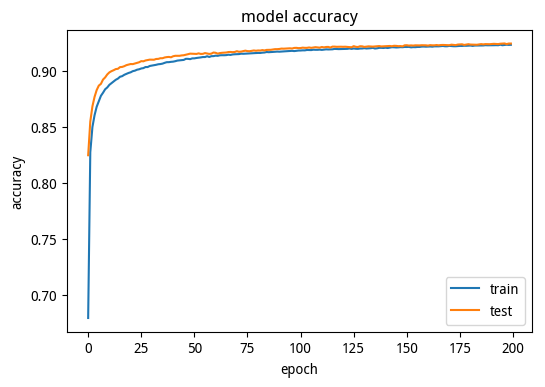

In [11]:
#绘出分类准确率曲线
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Running a simple Keras net and establishing a baseline
### 运行简单的Keras网络并建立一条参考线
So let's see what will happen when we run the code in the following screenshot:     
所以我们来看看当我们在下面的截图中运行代码时会发生什么：     
![](http://i4.buimg.com/588926/d9aadf0896fc9238.png)       
First, the net architecture is dumped, and we can see the different types of layers used, their output shape, how many parameters they need to optimize, and how they are connected. Then, the network is trained on 48,000 samples, and 12,000 are reserved for validation. Once the neural model is built, it is then tested on 10,000 samples. As you can see, Keras is internally using TensorFlow as a backend system for computation. For now, we don't go into the internals on how the training happens, but we can notice that the program runs for 200 iterations, and each time, the accuracy improves. When the training ends, we test our model on the test set and achieve about 92.30 % accuracy on training,92.41% on validation, and 92.27% on the test.           
首先，网络架构被转储，我们可以看到使用的不同类型的层，它们的输出形状，需要优化的参数以及它们的连接方式。 然后，该网络接受了48,000个样本的训练，12,000个被保留以用于验证。 一旦构建了神经模型，然后就可在10,000个样本上进行测试。 如您所见，Keras在内部使用TensorFlow作为后端系统进行计算。 现在，我们不关心训练在内部如何产生，但是我们可以注意到该程序运行了200次迭代，每次迭代精度都会提高。 训练结束后，我们对测试模型进行测试，训练准确率达92.30％，验证率达到92.41％，测试率达92.27％。      

This means that a bit less than one handwritten character out of ten is not correctly recognized. We can certainly do better than that. In the following screenshot, we can see the test accuracy:       
这意味着十分之一以下的一个手写字符不能被正确识别。 我们当然可以做得比那更好。 在下面的截图中，我们可以看到测试的准确性：     
![](http://i4.buimg.com/588926/cdcb9660a3181d15.png)
![](http://i4.buimg.com/588926/cebdb88934fc266f.png)   

### Improving the simple net in Keras with hidden layers
### 利用隐藏层改进Keras中的简单网络
We have a baseline accuracy of 92.30% on training, 92.41% on validation, and 92.27% on the test.This is a good starting point, but we can certainly improve it. Let's see how.     
我们有一个训练准确度为92.30％的参考线，验证率为92.41％，测试时为92.27％。这是一个很好的起点，但我们当然可以改善。 我们来看看如何实现。     

A first improvement is to add additional layers to our network. So, after the input layer, we have a first dense layer with the  N_HIDDEN neurons and an activation function  relu . This additional layer is considered hidden because it is not directly connected to either the input or the output. After the first hidden layer, we have a second hidden layer, again with the  N_HIDDEN neurons, followed by an output layer with 10 neurons, each of which will fire when the relative digit is recognized. The following code defines this new network:        
第一个改进方法是为我们的网络添加额外的层。 因此，在输入层之后，我们有一个具有N_HIDDEN个神经元和激活函数relu的第一dense层。 此附加层被认为是隐藏的，因为它不直接连接到输入或输出。 在第一个隐藏层之后，我们有一个第二个隐藏层，同样是N_HIDDEN个神经元，后面是一个10个神经元的输出层，当相关数字被识别时，它们都会触发。 以下代码定义了这个新网络：

In [12]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 118,282.0
Trainable params: 118,282.0
Non-trainable params: 0.0
_________________________

Let's run the code and see which result we get with this multilayer network. Not bad. By adding two hidden layers, we reached 94.55% on the training set, 94.97% on validation, and 94.62% on the test.This means that we gained an additional 2.2% accuracy on the test with respect to the previous network. However, we dramatically reduced the number of iterations from 200 to 20. That's good, but we want more.       
我们来运行代码，看看这个多层网络得到的结果。还不错， 通过增加两个隐藏层次，我们达到的准确率在训练集中为94.55％，验证时为94.97％，测试时为94.62％。这意味着我们比以前的网络测试提高了2.33％的准确性。 然而，我们将迭代次数从200个减少到了20个。这很好，但是我们想要更多。       


If you want, you can play by yourself and see what happens if you add only one hidden layer instead of two, or if you add more than two layers. I leave this experiment as an exercise. The following screenshot shows the output of the preceding example:          
如果你愿意，你可以自己玩，看看如果你只添加一个隐藏层而不是两个，或者如果你添加两个以上的层会发生什么。 我把这个实验作为一个练习。 以下屏幕截图显示了上述示例的输出：     
![](http://i2.muimg.com/588926/69a8fecb2d2b09ad.png)    

### Further improving the simple net in Keras with dropout     
### 利用dropout层进一步改进Keras中的简单网络        
Now our baseline is 94.55% on the training set, 94.96% on validation, and 94.60% on the test. A second improvement is very simple. We decide to randomly drop with the dropout probability some of the values propagated inside our internal dense network of hidden layers. In machine learning, this is a well-known form of regularization. Surprisingly enough, this idea of randomly dropping a few values can improve our performance:          
现在我们在训练集中准确率参考值为94.55％，验证时为94.96％，测试时为94.60％。 第二个改进很简单。 我们决定按概率随机删除一些包含有隐藏层的全连接(dense)网络的内部中传递的值（参考理解keras文档：Dropout将在训练过程中每次更新参数时随机断开一定百分比的输入神经元连接，Dropout层用于防止过拟合。）。 在机器学习中，这是一种众所周知的正规化形式。 令人惊讶的是，这种随机删除几个值的想法可以提高我们的性能：

In [13]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 250
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers 10 outputs
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
__________

Note that training accuracy should still be above the test accuracy, otherwise we are not training long enough. So let's try to increase significantly the number of epochs up to 250, and we get 98.08% accuracy on training, 97.79% on validation, and 97.76% on the test:      
请注意，训练准确率仍应高于测试准确率，否则我们不会训练足够长的时间。 所以我们试着大幅增加训练次数到250，训练的准确率达到98.08％，验证的准确率达97.76％，测试集的达97.79％：         
![](http://i2.muimg.com/588926/8c5eb6f03b1bfd8b.png)     

It is useful to observe how accuracy increases on training and test sets when the number of epochs increases. As you can see in the following graph, these two curves touch at about 250 epochs, and therefore, there is no need to train further after that point: 
当时训练次数增加时，观察训练和测试集的准确率是如何增加的，这点很有用。 如下图所示，这两条曲线约在训练250次时相交，因此，在此之后，无需进一步训练：
![](http://i2.muimg.com/588926/66ced1e3eef91bd4.png) 
   
Note that it has been frequently observed that networks with random dropout in internal hidden layers can generalize better on unseen examples contained in test sets. Intuitively, one can think of this as each neuron becoming more capable because it knows it cannot depend on its neighbors. During testing, there is no dropout, so we are now using all our highly tuned neurons. In short, it is generally a good approach to test how a net performs when some dropout function is adopted.         
注意，我们经常观察到，内部隐藏层中具有随机dropout层的网络可以更好地对包含未知样本的测试集进行推理。因为它知道它不能依赖于相邻的神经元，所以每个神经元将变得更有效，这一点人们能够很直观地想到。 进行测试时，可以先不设置dropout层，我们运行所有经过高度调整过的神经元。 简而言之，测试一个网络执行某些dropout函数时的运行情况，这通常是一种很好的方法。    

### Testing different optimizers in Keras
### 在Keras中测试不同的优化器       
We have defined and used a network; it is useful to start giving an intuition about how networks are trained. Let's focus on one popular training technique known as gradient descent (GD). Imagine a generic cost function $ C(w)$in one single variable w like in the following graph:
我们定义和使用了一个网络; 开始给出关于网络如何训练的直觉是有用的。 我们专注于一种被称为梯度下降（GD）的流行训练技术。 想象一个含有单一变量w的一般损失函数$C（w）$，如下图所示：     
![](http://i2.muimg.com/588926/dfc674d5766458c9.png)         
The gradient descent can be seen as a hiker who aims at climbing down a mountain into a valley. The mountain represents the function $C$, while the valley represents the minimum $C_{min}$ . The hiker has a starting point $w_0$ . The hiker moves little by little. At each step$r$, the gradient is the direction of maximum increase.Mathematically, this direction is the value of the partial derivative $ \frac{ac}{\partial w} $  evaluated at point $w_r$ reached at step $r$. Therefore by taking the opposite direction,  $ -\frac{ac}{\partial w}(w_r) $ , the hiker can move towards the valley. At each step, the hiker can decide what the leg length is before the next step. This is the learning rate $\eta\geq0$ in gradient descent jargon. Note that if $\eta$ is too small, then the hiker will move slowly. However, if $\eta$ is too high, then the hiker will possibly miss the valley.         
梯度下降可以被看作是一个从山坡攀登到山谷进行攀爬的人。 山代表函数$C$，而谷代表最小$C_{min}$。 徒步旅行者起点为$W_0$。 攀登者进行一点点移动。 对于每一步$r$，梯度是最大增加的方向。在数学上，该方向是在第$r$步达到的点$w_r$处估计的偏导数的值 $ \frac{ac}{\partial w} $ 。 因此，通过采取相反的方向，， $ -\frac{ac}{\partial w}(w_r) $，攀爬者可以向山谷移动。 对于每一步，徒步旅行者可以在下一步之前决定步长。 这是梯度下降术语中的学习率$\eta\geq0$。 请注意，如果$\eta$太小，那么攀爬者会慢慢移动。 然而，如果$\eta$太高，那么攀爬者可能会错过山谷。         

Now you should remember that a sigmoid is a continuous function, and it is possible to compute the derivative. It can be proven that the sigmoid is shown as follows:        
现在你应该记住，sigmoid 是一个连续的函数，可以计算导数。 可以证明，sigmoid如下所示：  
$$\sigma(x)= \frac{1}{1+e^{-x}}$$    
It has the following derivative:       
它的导数如下：
$$ \frac{d \sigma(x)}{d(x)}=\sigma(x)(1-\sigma(x))$$       
ReLU is not differentiable in 0. We can, however, extend the first derivative in 0 to a function over the whole domain by choosing it to be either 0 or 1. The point-wise derivative $y=max(0,x)$ of ReLU  is as follows:       
ReLU在0中是不可区分的。然而，我们可以通过选择0或1将整数域中的一阶导数扩展到整个域中。ReLU 函数$y=max(0,x)$的逐点导数如下： 
$$\frac{dy}{dx}=\left\{\begin{array}\\0\quad x\leq0\\1\quad x>0\end{array}\right.$$         

Once we have the derivative, it is possible to optimize the nets with a gradient descent technique.Keras uses its backend (either TensorFlow or Theano) for computing the derivative on our behalf so we don't need to worry about implementing or computing it. We just choose the activation function,and Keras computes its derivative on our behalf.        
一旦我们有了导数，就可以用梯度下降技术来优化网络.Keras使用它的后端（TensorFlow或者Theano）来代替我们计算导数，所以我们不用担心实现或计算它。 我们只是选择激活函数，则可以用Keras代替我们计算其导数。     

A neural network is essentially a composition of multiple functions with thousands, and sometimes millions, of parameters. Each network layer computes a function whose error should be minimized in order to improve the accuracy observed during the learning phase. When we discuss backpropagation, we will discover that the minimization game is a bit more complex than our toy example. However, it is still based on the same intuition of descending a valley.          
神经网络本质上是具有数千个有时数百万个参数的多个功能的组合体。 每个网络层计算一个其误差应该最小化函数，以提高在学习阶段观察到的精度。 当我们讨论反向传播时，我们将发现最小化“算法游戏”比我们的玩具示例更复杂一些。 然而，它仍然源于一个求从山谷下降过程的直观算法。   

Keras implements a fast variant of gradient descent known as stochastic gradient descent (SGD) and two more advanced optimization techniques known as RMSprop and Adam. RMSprop and Adam include the concept of momentum (a velocity component) in addition to the acceleration component that SGD has. This allows faster convergence at the cost of more computation. A full list of Keras-supported optimizers is at  https://keras.io/optimizers/ . SGD was our default choice so far. So now let's try the other two. It is very simple, we just need to change few lines:        
Keras实现了称为随机梯度下降（SGD）的梯度下降的快速变体技术以及称为RMSprop和Adam的两种更先进的优化技术。 除了SGD的加速度分量之外，RMSprop和Adam还包括动量概念（速度分量）。 这样可以以更多的计算为代价实现更快的收敛。 Keras支持的优化器的完整列表如下链接https://keras.io/optimizers 。SGD是我们的默认选择。 所以现在让我们试试另外两个。 这很简单，我们只需要改几行：


In [15]:
from keras.optimizers import RMSprop, Adam
...
OPTIMIZER = RMSprop() # optimizer,

That's it. Let's test it as shown in the following screenshot:           
这样就行了。 我们来测试它，如下面的屏幕截图所示（这里直接修改代码得出结果）：

In [16]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits

#OPTIMIZER = SGD() # optimizer, explained later in this chapter
OPTIMIZER = RMSprop() # optimizer,

N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers 10 outputs
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_8 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
__________

As you can see in the preceding screenshot, RMSprop is faster than SDG since we are able to achieve an accuracy of 97.89% on training, 97.63% on validation, and 97.95% on the test improving SDG with only 20 iterations. For the sake of completeness, let's see how the accuracy and loss change with the number of epochs, as shown in the following graphs:          
如上图所示，RMSprop比SDG快，因为我们能够在训练集上达到97.89％的准确率，验证时为97.63％，测试时为97.95％，只用20次训练就改进了SDG的结果。 为了完整起见，让我们看看准确性和损失如何随时代的变化而变化，如下图所示：        
              


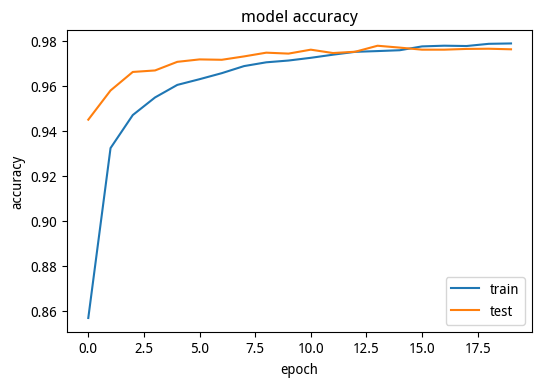

In [17]:
#绘出分类准确率曲线
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

OK, let's try the other optimizer,  Adam() . It is pretty simple, as follows:              
好的，让我们试试另一个优化器Adam（）。 这很简单，如下所示(此处修改代码直接执行)：

In [23]:
from __future__ import print_function
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits

#OPTIMIZER = SGD() # optimizer, explained later in this chapter
#OPTIMIZER = RMSprop() # optimizer,
OPTIMIZER = Adam() # optimizer

N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize
X_train /= 255
X_test /= 255
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
# M_HIDDEN hidden layers 10 outputs
model = Sequential()
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()
model.compile(loss='categorical_crossentropy',
optimizer=OPTIMIZER,
metrics=['accuracy'])
history = model.fit(X_train, Y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_26 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
activation_27 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)                1290      
__________

As we have seen, Adam is slightly better. With Adam, we achieve 98.18% accuracy on training,97.72% on validation, and 97.85% on the test with 20 iterations, as shown in the following graphs:         
正如我们所看到的，Adam 稍好些。 采用Adam，我们的准确率准确率达到98.18％，验证的准确率达到97.72％，测试时达到97.85％，训练次数为20次，如下图所示：

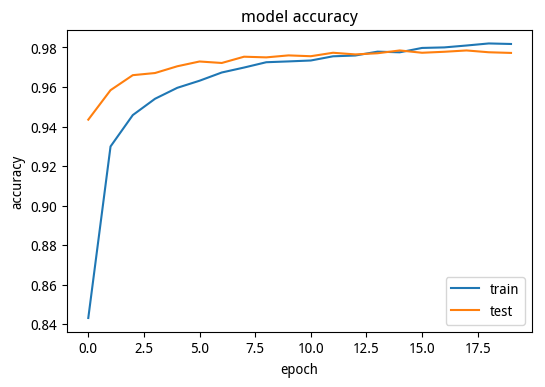

In [24]:
#绘出分类准确率曲线
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

This is our fifth variant, and remember that our initial baseline was at 92.27%.
这是我们的第五个修改的程序，并记住我们的初始准确率是92.27％。         

So far, we made progressive improvements; however, the gains are now more and more difficult.Note that we are optimizing with a dropout of 30%. For the sake of completeness, it could be useful to report the accuracy on the test only for other dropout values with  Adam() chosen as optimizer, as shown in the following graph:        
到目前为止，我们逐步完善; 然而，收益现在越来越困难。请注意，我们使用的是随机剔除参数dropout为30％进行优化。 为了完整起见，我们做一个设置其他dropout参数值的Adam（）优化器的测试准确性报告，如下图所示：
![](http://i4.buimg.com/588926/3f428119186f9a53.png)      
### Controlling the optimizer learning rate 
### 控制优化学习率     
There is another attempt we can make, which is changing the learning parameter for our optimizer. As you can see in the following graph, the optimal value is somewhere close to 0.001, which is the default learning rate for the optimer. Good! Adam works well out of the box:         
我们还可以做另一个尝试，这就是改变我们的优化器的学习参数。 如下图所示，优化器的值接近0.001，这是优化器的默认学习率。 好！  Adam优化器工作得很好：     
![](http://i2.muimg.com/588926/cd254eb24015439b.png) 
### Increasing the number of internal hidden neurons
### 增加内部隐藏神经元的数量         
We can make yet another attempt, that is, changing the number of internal hidden neurons. We report the results of the experiments with an increasing number of hidden neurons. We can see in the following graph that by increasing the complexity of the model, the run time increases significantly because there are more and more parameters to optimize. However, the gains that we are getting by increasing the size of the network decrease more and more as the network grows:           
我们可以做另一个尝试，也就是改变内部隐藏神经元的数量。 我们用越来越多的隐藏神经元得出实验结果。 我们可以在下图中看到，通过增加模型的复杂性，运行时间显着增加，因为有越来越多的参数需要进行优化。 然而，随着网络的增长，我们通过增加网络规模获得的收益越来越多：      
![](http://i4.buimg.com/588926/a5b78af98c1f7847.png)     
In the following graph, we show the time needed for each iteration as the number of hidden neurons grow:    
在下图中，我们显示每次迭代所需的时间，因为隐藏的神经元的数量增长：       
![](http://i2.muimg.com/588926/342376066c2588ae.png) 
The following graph shows the accuracy as the number of hidden neurons grow:        
下图显示了隐藏神经元数量增长的准确性：      
![](http://i2.muimg.com/588926/d51bffe741d1b335.png)        
### Increasing the size of batch computation       
### 增加batch计算的大小     
Gradient descent tries to minimize the cost function on all the examples provided in the training sets and, at the same time, for all the features provided in the input. Stochastic gradient descent is a much less expensive variant, which considers only  BATCH_SIZE examples. So, let's see what the behavior is by changing this parameter. As you can see, the optimal accuracy value is reached for  BATCH_SIZE=128 :       
对于所有的输入特征变量，梯度下降尝试将训练集中提供的所有样本的损失函数最小化。 随机梯度下降是一个不那么昂贵的变体，它只考虑BATCH_SIZE样本。 所以，我们来看看改变这个参数将导致什么行为。 如你所见，BATCH_SIZE = 128时达到了获得了最好的准确率：      
![](http://opzgwpokn.bkt.clouddn.com/17-5-15/57765380-file_1494832767337_693c.png)     
### Summarizing the experiments run for recognizing handwritten charts
### 总结识别手写实验的图表
So, let's summarize: with five different variants, we were able to improve our performance from 92.27% to 98.04%. First, we defined a simple layer network in Keras. Then, we improved the performance by adding some hidden layers. After that, we improved the performance on the test set by adding a few random dropouts to our network and by experimenting with different types of optimizers. Current results are summarized in the following table:      
所以我们总结一下：有五种不同的修改过得程序，我们可以将我们的成绩从92.27％提高到98.04％。 首先，我们在Keras中定义了一个简单的层网络。 然后，我们通过添加一些隐藏层来提高成绩。 之后，我们通过在我们的网络中添加了一些随机的dropouts参数值并通过实验不同类型的优化器来提高测试集的成绩。 目前的结果总结如下表：

| Model/Accuracy | Training      | Validation  |Test |
| -------------  |:-------------:| -----------:|----:|
| Simple         |    92.23%           |  92.41%           |  92.27%   |
| Two hidden(128)|       94.55%        |    94.9%         |   94.62%  |
| Dropout (30%)  |       98.08%        |       97.76%      |     97.79%|
|RMSprop         |     97.89%          |       97.63%      |  97.95%   |
| Adam           |        98.18%       |      97.72%       |    97.85% |

However, the next two experiments did not provide significant improvements. Increasing the number of internal neurons creates more complex models and requires more expensive computations, but it provides only marginal gains. We get the same experience if we increase the number of training epochs. A final experiment consisted in changing the  BATCH_SIZE for our optimizer.       
然而，接下来的两个实验没有提供显着的改进。 增加内部神经元的数量会产生更复杂的模型，需要更昂贵的计算，但它只能提供微小的收益。 如果我们增加训练次数的数量，我们将获得相同的经验。 最后一个实验中对于优化器更改了BATCH_SIZE的数量。       
### Adopting regularization for avoiding overfitting
### 采取正则化避免过拟
Intuitively, a good machine learning model should achieve low error on training data. Mathematically,this is equivalent to minimizing the loss function on the training data given the machine learning model built. This is expressed by the following formula：
直观地说，良好的机器学习模式应该在训练数据上实现低误差。 在数学上，这相当于在建立机器学习模型时最小化训练数据的损失函数。 这由以下公式表示：
![](http://opzgwpokn.bkt.clouddn.com/17-5-15/5692347-file_1494836313889_abbd.png)          
However, this might not be enough. A model can become excessively complex in order to capture all the relations inherently expressed by the training data. This increase of complexity might have two negative consequences. First, a complex model might require a significant amount of time to be executed. Second, a complex model can achieve very good performance on training data—because all the inherent relations in trained data are memorized, but not so good performance on validation data—as the model is not able to generalize on fresh unseen data. Again, learning is more about generalization than memorization. The following graph represents a typical loss function decreasing on both validation and training sets. However, a certain point the loss on validation starts to increase because of overfitting:        
但是，这可能还不够。 模型可能变得过于复杂，以便捕获训练数据固有表达的所有关系。 这种复杂性的增加可能会产生两个负面后果。 首先，复杂的模型可能需要大量的时间来执行。 第二，复杂的模型可以在训练数据方面取得非常好的表现，因为训练数据中的所有内在关系都被保留下来，但验证数据的性能并不好，因为模型不能推理出新的隐藏的数据。 再者，学习更多的是泛化而不是记忆。 以下图表示在验证和训练集上减少的典型损失函数。 然而，一定程度上，由于过度拟合，验证集上的损失度开始增加：    
![](http://opzgwpokn.bkt.clouddn.com/17-5-15/84989417-file_1494838844187_57bb.png)     
As a rule of thumb, if during the training we see that the loss increases on validation, after an initial decrease, then we have a problem of model complexity that overfits training. Indeed, overfitting is the word used in machine learning for concisely describing this phenomenon.      
根据经验，如果在训练期间，我们看到，验证的损失在首次下降之后增加，那么我们有一个过拟训练的模型复杂性问题。 事实上，过度拟合是机器学习中简单描述这种现象常见的词。        

In order to solve the overfitting problem, we need a way to capture the complexity of a model, that is,how complex a model can be. What could be the solution? Well, a model is nothing more than a vector of weights. Therefore the complexity of a model can be conveniently represented as the number of nonzero weights. In other words, if we have two models, M1 and M2, achieving pretty much the same performance in terms of loss function, then we should choose the simplest model that has the minimum number of nonzero weights. We can use a hyperparameter >=0 for controlling what the importance of having a simple model is, as in this formula:        
为了解决过度拟合问题，我们需要一种方法来捕捉模型的复杂性，即模型的复杂程度。 用什么可以解决这个问题？ 其实，一个模型只不过是一个权重的向量。 因此，模型的复杂性可以方便地表示为非零权重的数量。 换句话说，如果我们有两个模型M1和M2，在损失函数上实现了几乎相同的性能，那么我们应该选择具有最小数量的非零权重的最简单的模型。 我们可以使用超参数> = 0来控制具有简单模型的重要向量，如以下公式：     
![](http://opzgwpokn.bkt.clouddn.com/17-5-16/82723873-file_1494898778842_34b.png)        
There are three different types of regularizations used in machine learning:
机器学习有三种不同类型的正则化过程： 
* L1 regularization (also known as lasso): The complexity of the model is expressed as the sum of the absolute values of the weights
* L1正则化（也称为lasso）：模型的复杂度表示为权重的绝对值之和

* L2 regularization (also known as ridge): The complexity of the model is expressed as the sum of the squares of the weights
* L2正则化（也称为ridge）：模型的复杂度表示为权重的平方和

* Elastic net regularization: The complexity of the model is captured by a combination of the two preceding techniques
* 弹性网络正则化：模型的复杂性通过前述两种技术的组合来获取  

Note that the same idea of regularization can be applied independently to the weights, to the model,and to the activation. 
注意，正则化的相同想法可以独立地应用于权重，模型或者激活函数。      

Therefore, playing with regularization can be a good way to increase the performance of a network,in particular when there is an evident situation of overfitting. This set of experiments is left as an exercise for the interested reader.        
因此，进行正规化操作可以成为提高网络性能的好方法，特别是在出现过度拟合的情况时。 这些实验可以作为感兴趣的读者的练习。     

Note that Keras supports both L1, L2, and elastic net regularizations. Adding regularization is easy; for instance, here we have a  L2 regularizer for kernel (the weight W):         
请注意，Keras支持L1，L2和弹性网格正则化。 增加正则化的方法很容易; 例如，这里我们有一个内核的L2正则化（权重W）的例子：

In [36]:
from keras import regularizers model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01)))

SyntaxError: invalid syntax (<ipython-input-36-82dccbd5595e>, line 1)

A full description of the available parameters is available at:  https://keras.io/regularizers/             
有关可用参数的完整说明，请访问：https://keras.io/regularizers/         
### Hyperparameters tuning     
### 超参数调整          
The preceding experiments gave a sense of what the opportunities for fine-tuning a net are. However,what is working for this example is not necessarily working for other examples. For a given net, there are indeed multiple parameters that can be optimized (such as the number of  hidden neurons ,  BATCH_SIZE ,number of  epochs , and many more according to the complexity of the net itself).         
上述实验给出了一种微调网络的因素的方式。 然而，这个例子的工作不一定适用于其他例子。 对于给定的网络，确实可以根据网络本身的复杂性优化多个参数（如隐藏神经元的数量，BATCH_SIZE，训练次数等）。       

Hyperparameter tuning is the process of finding the optimal combination of those parameters that minimize cost functions. The key idea is that if we have n parameters, then we can imagine that they define a space with n dimensions, and the goal is to find the point in this space which corresponds to an optimal value for the cost function. One way to achieve this goal is to create a grid in this space and systematically check for each grid vertex what the value assumed by the cost function is. In other words, the parameters are divided into buckets, and different combinations of values are checked via a brute force approach.         
超参数调整是找到最小化成本函数的那些参数的最佳组合的过程。 关键思想是，如果我们有n个参数，那么我们可以想象它们了定义一个具有n维的空间，目的是找到这个空间中对应于成本函数的最优值的点。 实现此目标的一种方法是在此空间中创建一个网格，并系统地检查每个网格顶点是否具有成本函数假设的值。 换句话说，这些参数被划分为桶，并且通过暴力法来检查值的不同组合。   

### Predicting output
### 预测输出
When a net is trained, it can be course be used for predictions. In Keras, this is very simple. We can use the following method:       
当网络被训练时，它可以被用于预测。 在Keras中这很简单。 我们可以使用以下方法：

In [37]:
# calculate predictions
predictions = model.predict(X)

NameError: name 'X' is not defined

For a given input, several types of output can be computed, including a method:
对于给定的输入，可以计算出几种类型的输出，包括以下方法： 
* model.evaluate() : This is used to compute the loss values
* model.evaluate（）：用于计算损失值

* model.predict_classes() : This is used to compute category outputs
* model.predict_classes（）：这用于计算类别输出

* model.predict_proba() : This is used to compute class probabilities
* model.predict_proba（）：这是用于计算类的概率      


## A practical overview of backpropagation
## 反向传播的实用概述
Multilayer perceptrons learn from training data through a process called backpropagation. The process can be described as a way of progressively correcting mistakes as soon as they are detected.Let's see how this works.        
多层感知器通过称为反向传播的过程从训练数据中学习。 该过程可以被描述为在检测到错误之后逐渐纠正错误的方法。看看它是如何工作的。        

Remember that each neural network layer has an associated set of weights that determines the output values for a given set of inputs. In addition to that, remember that a neural network can have multiple hidden layers.       
请记住，每个神经网络层都有一组相关的权重，用于确定给定输入集合的输出值。 除此之外，请记住神经网络可以有多个隐藏层。      

In the beginning, all the weights have some random assignment. Then the net is activated for each input in the training set: values are propagated forward from the input stage through the hidden stages to the output stage where a prediction is made (note that we have kept the following diagram simple by only representing a few values with green dotted lines, but in reality, all the values are propagated forward through the network):      
一开始，所有的权重都是被随机分配的。 然后，网络被训练集中的每个输入激活：值从输入阶段到隐藏阶段向前传播一直到进行预测的输出阶段（请注意，我们通过仅用绿色虚线表示几个值，让以下图表得以简单呈现，在现实中，所有的值都通过网络向前传播）：
![](http://opzgwpokn.bkt.clouddn.com/17-5-16/29763060-file_1494919741916_14cfc.png)    
Since we know the true observed value in the training set, it is possible to calculate the error made in prediction. The key intuition for backtracking is to propagate the error back and use an appropriate optimizer algorithm, such as a gradient descent, to adjust the neural network weights with the goal of reducing the error (again for the sake of simplicity, only a few error values are represented):          
由于我们知道训练集中的真实观察值，因此可以计算预测中的误差。 回溯的关键点是将错误传播回来，并使用适当的优化器算法（如梯度下降）来调整神经网络权重，目的是减少错误（为了简单起见，我们只需要几个错误值）：       
![](http://opzgwpokn.bkt.clouddn.com/17-5-16/36650866-file_1494920011324_112f1.png)
The process of forward propagation from input to output and backward propagation of errors is repeated several times until the error gets below a predefined threshold. The whole process is represented in the following diagram:      
从输入到输出的正向传播和错误的反向传播的过程需要重复几次，直到误差低于预定阈值。 整个过程如下图所示：     
![](http://opzgwpokn.bkt.clouddn.com/17-5-16/15844639-file_1494920147987_9534.png)
The features represent the input and the labels are here used to drive the learning process. The model is updated in such a way that the loss function is progressively minimized. In a neural network, what really matters is not the output of a single neuron but the collective weights adjusted in each layer.Therefore, the network progressively adjusts its internal weights in such a way that the prediction increases the number of labels correctly forecasted. Of course, using the right set features and having a quality labeled data is fundamental to minimizing the bias during the learning process.        
功能表示输入，标签在这里用于驱动学习过程。 该模型以损失函数逐步最小化的方式进行更新。 在神经网络中，真正重要的不是单个神经元的输出，而是在每层中调整集体权重。因此，网络逐渐调整其内部权重，使得预测增加了正确预测的标签数量。 当然，使用正确的集合特征并具有高质量的标记数据是在学习过程中最小化偏差的基础。      


## Towards a deep learning approach
## 迈向深入学习的方法      
While playing with handwritten digit recognition, we came to the conclusion that the closer we get to the accuracy of 99%, the more difficult it is to improve. If we want to have more improvements, we definitely need a new idea. What are we missing? Think about it.        
在使用手写数字识别的同时，我们得出结论，我们越接近99％的准确度，改进越困难。 如果我们想要有更多的改进，我们肯定需要一个新的想法。 我们缺少什么？ 想想吧

The fundamental intuition is that, so far, we lost all the information related to the local spatiality of the images. In particular, this piece of code transforms the bitmap, representing each written digit into a flat vector where the spatial locality is gone:        
根本的点是，到目前为止，我们失去了与图像的局部空间相关的所有信息。 特别地，这段代码将位图转换成空间位置消失的平面向量：

In [38]:
#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

However, this is not how our brain works. Remember that our vision is based on multiple cortex levels, each one recognizing more and more structured information, still preserving the locality. First we see single pixels, then from that, we recognize simple geometric forms and then more and more sophisticated elements such as objects, faces, human bodies, animals and so on.
然而，这不是我们的大脑工作的方式。 请记住，我们的愿景是基于多个皮质层次，每个层级都认识到越来越多的结构化信息，仍然保留了本地化。 首先我们看到单像素，然后从中我们识别简单的几何形状，然后识别出越来越复杂的元素，如物体，人脸，人体，动物等等。        

In  Chapter 3 , Deep Learning with ConvNets, we will see that a particular type of deep learning network known as convolutional neural network (CNN) has been developed by taking into account both the idea of preserving the spatial locality in images (and, more generally, in any type of information) and the idea of learning via progressive levels of abstraction: with one layer, you can only learn simple patterns; with more than one layer, you can learn multiple patterns. Before discussing CNN, we need to discuss some aspects of Keras architecture and have a practical introduction to a few additional machine learning concepts. This will be the topic of the next chapters.         
在第3章，深度学习的ConvNets方法中，我们将看到，已经开发了一种特定类型的深度学习网络，称为卷积神经网络（CNN），CNN会考虑保存图像（甚至更一般地，任何类型的信息）中空间局部性的概念， 同时，我们看到有了通过渐进层次抽象学习的思想：若只有一层，你只能学习简单的模式; 具有多层，您则可以学习各种图案。 在讨论CNN之前，我们需要讨论Keras架构的一些方面，并在实践中引入几个额外的机器学习概念。 这将是下一章的主题。    
## Summary
## 概要           
In this chapter, you learned the basics of neural networks, more specifically, what a perceptron is,what a multilayer perceptron is, how to define neural networks in Keras, how to progressively improve metrics once a good baseline is established, and how to fine-tune the hyperparameter's space. In addition to that, you now also have an intuitive idea of what some useful activation functions (sigmoid and ReLU) are, and how to train a network with backpropagation algorithms based on either gradient descent, on stochastic gradient descent, or on more sophisticated approaches, such as Adam and RMSprop.     
在本章中，您学习了神经网络的基础知识，更具体地说，感知器是什么，多层感知器是什么，如何在Keras中定义神经网络，如果建立良好的基线，如何逐步改进指标，以及如何处理 调整超参数的空间。 此外，您现在还可以直观了解一些有用的激活功能（Sigmoid和ReLU），以及如何使用基于梯度下降，随机梯度下降或更复杂的方法的反向传播算法来训练网络 ，如Adam和RMSprop。        

In the next chapter, we will see how to install Keras on AWS, Microsoft Azure, Google Cloud, and on your own machine. In addition to that, we will provide an overview of Keras APIs.
在下一章中，我们将看到如何在AWS，Microsoft Azure，Google Cloud以及自己的机器上安装Keras。 除此之外，我们将提供Keras API的概述。